<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/s%26p_banks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-06-27

In [3]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
# CAUTION: this dataset is 719 MB in size.

# this doesn't work for this large file (seems that it would work for file under 50 MB)
# url = "https://drive.google.com/uc?id=1giGHkApdv3ehRI7uw4LoLhGT6rN_uR0r"

# this works
# url = "https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD"
# df = pd.read_csv(url)

# this works
path = "/content/drive/My Drive/data/cfpd_consumer_complaints/Consumer_Complaints.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# convert datetime
df['datereceived'] = pd.to_datetime(df['Date received'], 
                                    format="%m/%d/%Y")
df['datesent'] = pd.to_datetime(df['Date sent to company'],
                                format="%m/%d/%Y")
df[['datereceived', 'datesent']].sample(4)

,datereceived,datesent
703165,2016-07-29,2016-07-29
1304051,2012-03-08,2012-03-09
373738,2018-01-04,2018-01-04
154873,2018-11-02,2018-11-02


In [0]:
# consolidate changes in products - such a pain

def new_prd(row):
  prd, sub = row[0], row[1]
  new_prd = ""
  
  # Debt collection (no change to product name)
  if prd in [prds[7]]:
    new_prd = prds[7]
  # Credit reporting, credit repair services, or other 
  # personal consumer reports (previously “Credit reporting”
  # and sub-products of “Other financial service”)
  elif prd in [prds[5], prds[6]]:
    new_prd = prds[6]
  # Mortgage (no change to product name)
  elif prd in [prds[10]]:
    new_prd = prds[10]
  # Credit card or prepaid card (previously “Credit card” 
  # and “Prepaid card”)  
  elif prd in [prds[3], prds[14], prds[4]]:
    new_prd = prds[4]
  # Checking or savings account (previously Bank account 
  # or service)  
  elif prd in [prds[0], prds[1]]:
    new_prd = prds[1]
  # Vehicle loan or lease (previously sub-product of 
  # Consumer loan)  
  elif prd==prds[16] or (prd==prds[2] and sub==subs[8]):
    new_prd = prds[16]
  # Student loan (no change to product name)  
  elif prd in [prds[15]]:
    new_prd = prds[15]
  # Payday loan, title loan, or personal loan (previously 
  # “Consumer loan” and “Payday loan”)
  elif prd in [prds[13], prds[12]] or (prd==prds[2] 
                                       and sub!=subs[8]):
    new_prd = prds[13]
  # Money transfer, virtual currency, or money service 
  # (previously “Money transfers,” “Other financial 
  # service,” and “Prepaid card”)  
  elif prd in [prds[8], prds[17], prds[9], prds[11], 
               prds[14]]:
    new_prd = prds[8]
  
  return new_prd

In [8]:
df_prd = (df.fillna('-')
   .groupby(by=['Product', 'Sub-product'], as_index=False)
   .agg({'Complaint ID': pd.Series.nunique})
   .sort_values(by=['Product', 'Complaint ID'], 
                ascending=(True, False))
)
# print(df_prd.shape) # (99, 3)

prds = df_prd['Product'].unique()
subs = df_prd['Sub-product'].unique()

# consolidate products for the whole dataset
df['new'] = df.iloc[:,1:3].apply(new_prd, axis=1)
# verify consolidation - result data frame should be empty
df[df['new']=='']

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,datereceived,datesent,new


S&P Banks Select Industry Index  
Ticker:  SPSIBK  
https://us.spindices.com/indices/equity/sp-banks-select-industry-index  

**S&P Select Industry Index**                      
S&P Banks Select Industry Index    
**Theoretical Portfolio Value**    
$2,000,000,000  
https://us.spindices.com/documents/methodologies/methodology-sp-select-industry-indices.pdf?force_download=true  

**Large Commercial Banks**  
https://www.federalreserve.gov/releases/lbr/current/  
https://www.federalreserve.gov/releases/lbr/  

**CSV file on Gist**  
https://gist.githubusercontent.com/Nov05/91a6ba49ede748ad32998e0c31a2fa35/raw/c92e0b758087b16723f11832432a033efec89bf5/9.csv  

In [9]:
# url = "https://www.federalreserve.gov/releases/lbr/current/lrg_bnk_lst.txt"

# ASCII file - better find a better data source
# yeah copy the table data then convert it from tab separated file to CSV
# I love myself. Haha.

url = "https://gist.githubusercontent.com/Nov05/91a6ba49ede748ad32998e0c31a2fa35/raw/c92e0b758087b16723f11832432a033efec89bf5/9.csv"
df_banks = pd.read_csv(url)
print(df_banks.shape)
df_banks.head(2)

(1817, 13)


,Bank Name / Holding Co Name,Nat'l Rank,Bank ID,Bank Location,Charter,Consol Assets (Mil $),Domestic Assets (Mil $),Pct Domestic Assets,Pct Cumulative Assets,Domestic Branches,Foreign Branches,IBF,Pct Foreign Owned
0,JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO,1,852218,"COLUMBUS, OH",NAT,"2,218,960","1,659,733",75,14,"5,041",33,Y,0.00
1,BANK OF AMER NA/BANK OF AMER CORP,2,480228,"CHARLOTTE, NC",NAT,"1,782,639","1,690,841",95,25,"4,338",27,Y,0.00


In [10]:
# check NAs
print(df_banks.isna().sum().sum(),
df['Company'].isna().sum())

0 0


In [11]:
type(df_banks['Consol Assets (Mil $)'])

pandas.core.series.Series

In [12]:
# convert numeric field
(df_banks['Consol Assets (Mil $)']
 .replace([",","\."], ["",""], 
          regex=True, inplace=True)
)
df_banks['Consol Assets (Mil $)'] = pd.to_numeric(df_banks['Consol Assets (Mil $)'])
df_banks['Consol Assets (Mil $)'].head(2)

0    2218960.0
1    1782639.0
Name: Consol Assets (Mil $), dtype: float64

In [13]:
type(df_banks.iloc[0,5])

numpy.float64

In [14]:
# check unique bank names and test text processing
df_names = pd.DataFrame(df['Company'].unique())
df_names[0] = df_names[0].str.upper()
df_names.replace('\.', '', regex=True, inplace=True)
print(df_names.shape)
df_names.head()

(5321, 1)


,0
0,NATIONWIDE RECOVERY GROUP LLC
1,"ONEMAIN FINANCIAL HOLDINGS, LLC"
2,"HCFS HEALTH CARE FINANCIAL SERVICES, INC"
3,NAVY FEDERAL CREDIT UNION
4,FIRST CREDIT FINANCE


In [15]:
# process texts
df['bankname'] = (df['Company']
                  .str.upper()
                  .replace('\.', '', regex=True))
df['bankname'].head()

0               NATIONWIDE RECOVERY GROUP LLC
1             ONEMAIN FINANCIAL HOLDINGS, LLC
2    HCFS HEALTH CARE FINANCIAL SERVICES, INC
3                   NAVY FEDERAL CREDIT UNION
4                        FIRST CREDIT FINANCE
Name: bankname, dtype: object

In [16]:
# join two tables on names, god bless you
# (should be joined on bank id, but there are no bank ids
#  in the complaint dataset...)

df_all = pd.merge(df, df_banks, how='inner',
                  left_on = 'bankname',
                  right_on = 'Bank Name / Holding Co Name'
                 )
print(df_all.shape)
df_all[['bankname', 'Consol Assets (Mil $)']].head()

(0, 35)


,bankname,Consol Assets (Mil $)


In [17]:
# test contains
df_names[df_names[0].str.contains('BANK OF AMERICA')]

,0
123,"BANK OF AMERICA, NATIONAL ASSOCIATION"


In [18]:
df_names[df_names[0].str.contains('JPMORGAN')]

,0
49,JPMORGAN CHASE & CO


In [19]:
# ok. match records manually for a few banks...
# s[s.str.contains('|'.join(searchfor))]
top20 = ['JPMORGAN',  
         'BANK OF AMER', 
         'WELLS FARGO',
         'CITIBANK',
         'US BANC',
         'PNC BANK',
         'CAPITAL ONE',
         'TD BANK',
         'NY MELLON',
         'STATE STREET',
         'BB&T',
         'SUNTRUST',
         'GOLDMAN SACHS',
         'HSBC',
         'ALLY F', 
         'MORGAN STANLEY',
         'FIFTH THIRD',
         'KEYCORP',
         'CHASE', # not found, it is probably with JPMORGAN
         'NORTHERN T',
         'MUFG'
        ]
df_matches = df_names[df_names[0].str.contains('|'.join(top20))]
print(len(top20))
print(df_matches.shape)
df_matches

21
(20, 1)


,0
8,ALLY FINANCIAL INC
29,US BANCORP
35,HSBC NORTH AMERICA HOLDINGS INC
49,JPMORGAN CHASE & CO
50,"CITIBANK, NA"
78,WELLS FARGO & COMPANY
123,"BANK OF AMERICA, NATIONAL ASSOCIATION"
147,BB&T CORPORATION
155,FIFTH THIRD FINANCIAL CORPORATION
182,CAPITAL ONE FINANCIAL CORPORATION


In [20]:
# 1. JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO
# 20. CHASE BK USA NA/JPMORGAN CHASE & CO
df_names[df_names[0].str.contains('CHASE')]

,0
49,JPMORGAN CHASE & CO


In [21]:
condition = (df['datereceived']<=datetime(2018,12,31))
df_all = pd.merge(df_matches, df[condition], how='inner',
                  left_on=0, right_on='bankname'
                 )
condition = ((df['datereceived']<=datetime(2018,12,31)) &
             (df['datereceived']>=datetime(2018,1,1))
            )
df_2018 = pd.merge(df_matches, df[condition], how='inner',
                  left_on=0, right_on='bankname'
                 )
print(df_all.shape, df_2018.shape)

(358110, 23) (52794, 23)


# Finally it worked. Such a pain. Hate joining data on texts.

In [22]:
df_tops = (df_all
 .groupby(by='bankname', as_index=False)
 .agg({'Complaint ID':pd.Series.nunique})
 .sort_values(by='Complaint ID',
              ascending=False)
)
df_tops.index=[x for x in np.arange(20)]
print(df_tops.shape)
df_tops

(20, 2)


,bankname,Complaint ID
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",80084
1,WELLS FARGO & COMPANY,68341
2,JPMORGAN CHASE & CO,57414
3,"CITIBANK, NA",46746
4,CAPITAL ONE FINANCIAL CORPORATION,32240
5,US BANCORP,16404
6,PNC BANK NA,11312
7,TD BANK US HOLDING COMPANY,9160
8,HSBC NORTH AMERICA HOLDINGS INC,8462
9,"SUNTRUST BANKS, INC",8234


In [23]:
df_banks.iloc[:21,0] 
# [1,2,0,3,6,4,5,7,13,11,14,16,10,17,20,15,12,8,19,9]

0         JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO
1                BANK OF AMER NA/BANK OF AMER CORP
2               WELLS FARGO BK NA/WELLS FARGO & CO
3                            CITIBANK NA/CITIGROUP
4                                 U S BK NA/U S BC
5                     PNC BK NA/PNC FNCL SVC GROUP
6                    CAPITAL ONE NA/CAPITAL ONE FC
7                    T D BK NA/TD GRP US HOLDS LLC
8         BANK OF NY MELLON/BANK OF NY MELLON CORP
9              STATE STREET B&TC/STATE STREET CORP
10                         BRANCH BKG&TC/BB&T CORP
11                         SUNTRUST BK/SUNTRUST BK
12    GOLDMAN SACHS BK USA/GOLDMAN SACHS GROUP THE
13                HSBC BK USA NA/HSBC N AMER HOLDS
14                               ALLY BK/ALLY FNCL
15             MORGAN STANLEY BK NA/MORGAN STANLEY
16                   FIFTH THIRD BK/FIFTH THIRD BC
17                              KEYBANK NA/KEYCORP
18             CHASE BK USA NA/JPMORGAN CHASE & CO
19                    NORTHERN 

In [24]:
seq = [1,2,0,3,6,4,5,7,13,11,14,16,10,17,20,15,12,8,19,9]
len(seq)

20

In [25]:
df_topbanks = pd.DataFrame([df_banks.iloc[:21,[0,1,2,5]].values[s] for s in seq])
df_topbanks.head(3)

,0,1,2,3
0,BANK OF AMER NA/BANK OF AMER CORP,2,480228,1782639.0
1,WELLS FARGO BK NA/WELLS FARGO & CO,3,451965,1689351.0
2,JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO,1,852218,2218960.0


In [26]:
df_rank = pd.concat([df_tops, df_topbanks], axis=1)
print(df_rank.columns)
df_rank.columns = ['Bank Name', 'Complaint Count',  'Bank Name 2', 'Nat\'l Rank', 'Bank ID', 'Consol Assets (Mil $)']
df_rank['Compl/Bil $'] = df_rank['Complaint Count'] * 1000 / df_rank['Consol Assets (Mil $)']
df_rank = df_rank.sort_values(by="Compl/Bil $", ascending=False)
df_rank["Compl/Bil $"] = df_rank["Compl/Bil $"].round(3)
df_rank.index = [x for x in np.arange(20)]
df_rank.iloc[:,[0,3,5,1,6]].to_csv("alltime.csv", index=False)
df_rank

Index(['bankname', 'Complaint ID', 0, 1, 2, 3], dtype='object')


,Bank Name,Complaint Count,Bank Name 2,Nat'l Rank,Bank ID,Consol Assets (Mil $),Compl/Bil $
0,CAPITAL ONE FINANCIAL CORPORATION,32240,CAPITAL ONE NA/CAPITAL ONE FC,7,112837,304658.0,105.824
1,HSBC NORTH AMERICA HOLDINGS INC,8462,HSBC BK USA NA/HSBC N AMER HOLDS,14,413208,169812.0,49.832
2,"BANK OF AMERICA, NATIONAL ASSOCIATION",80084,BANK OF AMER NA/BANK OF AMER CORP,2,480228,1782639.0,44.924
3,WELLS FARGO & COMPANY,68341,WELLS FARGO BK NA/WELLS FARGO & CO,3,451965,1689351.0,40.454
4,"SUNTRUST BANKS, INC",8234,SUNTRUST BK/SUNTRUST BK,12,675332,209720.0,39.262
5,US BANCORP,16404,U S BK NA/U S BC,5,504713,459477.0,35.701
6,FIFTH THIRD FINANCIAL CORPORATION,5037,FIFTH THIRD BK/FIFTH THIRD BC,17,723112,144453.0,34.869
7,"CITIBANK, NA",46746,CITIBANK NA/CITIGROUP,4,476810,1406717.0,33.231
8,ALLY FINANCIAL INC,5181,ALLY BK/ALLY FNCL,15,3284070,159291.0,32.525
9,PNC BANK NA,11312,PNC BK NA/PNC FNCL SVC GROUP,6,817824,370501.0,30.532


**Reference**  
https://lendedu.com/blog/banks-cfpb-complaints-2018/  

In [32]:
df_tops_2018 = (df_2018
 .groupby(by='bankname', as_index=False)
 .agg({'Complaint ID':pd.Series.nunique})
 .sort_values(by='Complaint ID',
              ascending=False)
)
df_tops_2018.index=[x for x in np.arange(20)]
print(df_tops_2018.shape)
# df_tops_2018

(20, 2)


In [0]:
# df_banks.iloc[:21,0]
seq_2018 = [0,2,1,6,3,4,7,5,11,14,13,16,10,17,20,12,8,19,15,9]
df_topbanks_2018 = pd.DataFrame([df_banks.iloc[:21,[0,1,2,5]].values[s] for s in seq_2018])

In [41]:
df_rank_2018 = pd.concat([df_tops_2018, df_topbanks_2018], axis=1)
df_rank_2018.columns = ['Bank Name', 'Complaint Count',  'Bank Name 2', 'Nat\'l Rank', 'Bank ID', 'Consol Assets (Mil $)']
df_rank_2018['Compl/Bil $'] = df_rank_2018['Complaint Count'] * 1000 / df_rank_2018['Consol Assets (Mil $)']
df_rank_2018 = df_rank_2018.sort_values(by="Compl/Bil $", ascending=False)
df_rank_2018["Compl/Bil $"] = df_rank_2018["Compl/Bil $"].round(3)
df_rank_2018.index = [x for x in np.arange(20)]
df_rank_2018.iloc[:,[0,3,5,1,6]].to_csv("2018.csv", index=False)
df_rank_2018 

,Bank Name,Complaint Count,Bank Name 2,Nat'l Rank,Bank ID,Consol Assets (Mil $),Compl/Bil $
0,CAPITAL ONE FINANCIAL CORPORATION,7676,CAPITAL ONE NA/CAPITAL ONE FC,7,112837,304658.0,25.195
1,ALLY FINANCIAL INC,1119,ALLY BK/ALLY FNCL,15,3284070,159291.0,7.025
2,TD BANK US HOLDING COMPANY,2117,T D BK NA/TD GRP US HOLDS LLC,8,497404,302669.0,6.994
3,FIFTH THIRD FINANCIAL CORPORATION,824,FIFTH THIRD BK/FIFTH THIRD BC,17,723112,144453.0,5.704
4,"SUNTRUST BANKS, INC",1175,SUNTRUST BK/SUNTRUST BK,12,675332,209720.0,5.603
5,US BANCORP,2391,U S BK NA/U S BC,5,504713,459477.0,5.204
6,WELLS FARGO & COMPANY,8789,WELLS FARGO BK NA/WELLS FARGO & CO,3,451965,1689351.0,5.203
7,"CITIBANK, NA",7263,CITIBANK NA/CITIGROUP,4,476810,1406717.0,5.163
8,HSBC NORTH AMERICA HOLDINGS INC,839,HSBC BK USA NA/HSBC N AMER HOLDS,14,413208,169812.0,4.941
9,"BANK OF AMERICA, NATIONAL ASSOCIATION",8312,BANK OF AMER NA/BANK OF AMER CORP,2,480228,1782639.0,4.663


# Time to plot  _(:з」∠) _

In [36]:
# df_rank['log']= np.log10(df_rank['Compl/Bil $']*1000)
# df_rank_2018['log']= np.log10(df_rank_2018['Compl/Bil $']*1000)

# sort all time data to 2018 sequence
df_rank_2018.sort_values(by="Compl/Bil $",
                         inplace=True
                        )
seq=[df_rank['Bank Name'].tolist().index(b) for b in df_rank_2018['Bank Name']]
df_rank = pd.DataFrame([df_rank.loc[s].tolist() for s in seq])
df_rank.columns = df_rank_2018.columns
df_rank.head()

,Bank Name,Complaint Count,Bank Name 2,Nat'l Rank,Bank ID,Consol Assets (Mil $),Compl/Bil $
0,STATE STREET BANK AND TRUST COMPANY,20,STATE STREET B&TC/STATE STREET CORP,10,35301,242038.0,0.083
1,MORGAN STANLEY & CO LLC,326,MORGAN STANLEY BK NA/MORGAN STANLEY,16,1456501,149817.0,2.176
2,"NORTHERN TRUST COMPANY, THE",77,NORTHERN TC/NORTHERN TR CORP,20,210434,131696.0,0.585
3,"BNY MELLON, NATIONAL ASSOCIATION",258,GOLDMAN SACHS BK USA/GOLDMAN SACHS GROUP THE,13,2182786,191517.0,1.347
4,GOLDMAN SACHS BANK USA,253,BANK OF NY MELLON/BANK OF NY MELLON CORP,9,541101,286411.0,0.883


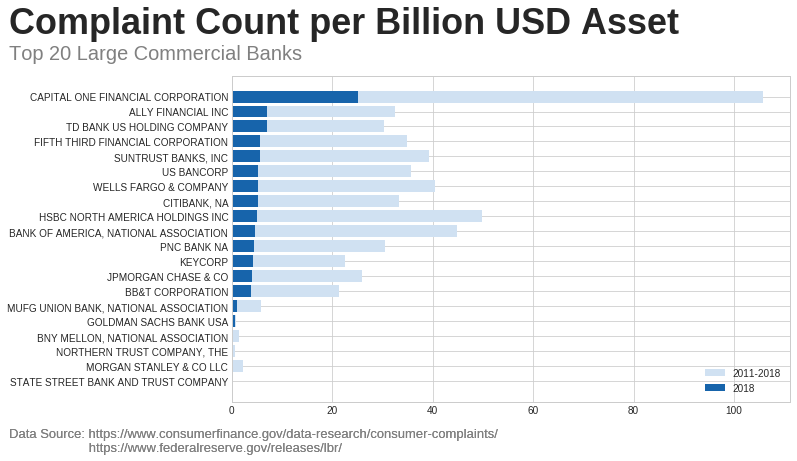

In [38]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('seaborn-whitegrid')
colors=cm.Blues(np.linspace(0.2,0.8,5))

fig, ax = plt.subplots(1,1,figsize=(10,6))


b1 = ax.barh(y='Bank Name',
             width='Compl/Bil $',
             data=df_rank,
             color=colors[0],
             label='2011-2018'
            );
b2 = ax.barh(y='Bank Name',
             width='Compl/Bil $',
             data=df_rank_2018,
             color=colors[4],
             label='2018'
            );
ax.legend();
xpos=-0.4
plt.text(s="Complaint Count per Billion USD Asset",
         x=xpos, y=1.13,
         fontsize=36, fontweight='bold',
         transform=ax.transAxes
        )
str="Top 20 Large Commercial Banks"
plt.text(s=str,
         x=xpos, y=1.05,
         fontsize=20, color='gray',
         transform=ax.transAxes
        );
str="Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/\n                      https://www.federalreserve.gov/releases/lbr/"
plt.text(s=str, x=xpos, y=-0.15,
         fontsize=13, color='gray',
         transform=ax.transAxes
        );
plt.text(s=str, x=xpos, y=-0.15,
         fontsize=13, color='gray',
         transform=ax.transAxes
        );